Adınız: Muhammed Mert

Soyadınız: Sayan

Okul No: 2212721028

GitHub Repo Bağlantısı: https://github.com/MertSayan/CNN_siniflandirma

Model2’de gözlemlenen overfitting ve sınıf karışıklıkları, veri artırımı ve hiperparametre optimizasyonu ile iyileştirilebilir. Bu nedenle Model3’te daha derin bir mimari, farklı dropout oranları ve online data augmentation uygulanacaktır.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Dataset klasör yollarını tanımlıyorum.
# Aynı train / val / test ayrımını kullanıyorum.
import os

base_dir = "/content/drive/MyDrive/CNN_Dis_Odevi/dataset_split"

train_dir = base_dir + "/train"
val_dir   = base_dir + "/val"
test_dir  = base_dir + "/test"

print("Train klasörleri:", os.listdir(train_dir))
print("Val klasörleri:", os.listdir(val_dir))
print("Test klasörleri:", os.listdir(test_dir))

Train klasörleri: ['dis_fircasi', 'dis_macunu']
Val klasörleri: ['dis_fircasi', 'dis_macunu']
Test klasörleri: ['dis_fircasi', 'dis_macunu']


Found 99 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4309 - loss: 1.1842 - val_accuracy: 0.4762 - val_loss: 0.7004
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.4744 - loss: 0.7362 - val_accuracy: 0.4762 - val_loss: 0.6718
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.4758 - loss: 0.6848 - val_accuracy: 0.7619 - val_loss: 0.6456
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.4033 - loss: 0.7149 - val_accuracy: 0.4762 - val_loss: 0.6470
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.6339 - loss: 0.6584 - val_accuracy: 0.7619 - val_loss: 0.6236
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.7057 - loss: 0.6340 - val_accuracy: 0.7619 - val_loss: 0.5510
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.6455 - loss: 0.5470 - val_accuracy: 0.8571 - val_loss: 0.4666
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.6850 - loss: 0.6225 - val_accuracy: 0.8095 - val_loss: 0

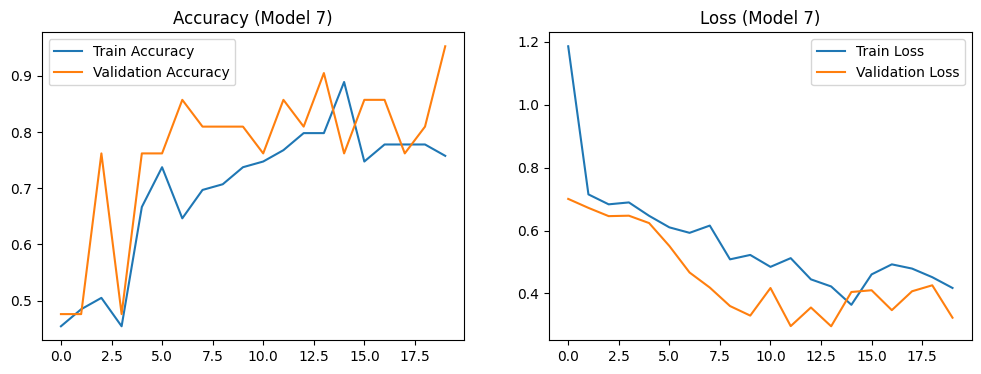

In [ ]:

#Veri arttırımı yapıyoruz
# Modeli yormamak için çok hafif değerler seçtik.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,      # 8-15 arası bu parametre için idealmiş
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Batch size 32'de kalmalı, grafikteki dalgalanmayı batch size değil dropout yapıyordu.
batch_size_optimal = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size_optimal,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size_optimal,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size_optimal,
    class_mode='categorical',
    shuffle=False
)

# MODEL 7 (OPTIMIZE EDİLMİŞ 3 KATMANLI YAPI)

model7 = Sequential()

# 1. Blok: Dropout'u kaldırdık! İlk katmanda model veriyi net görsün.
model7.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model7.add(MaxPooling2D(2,2))
# Buraya dropout koymuyorum, ilk öğrenme temiz olsunu deniyorum.

# 2. Blok
model7.add(Conv2D(64, (3,3), activation='relu'))
model7.add(MaxPooling2D(2,2))
model7.add(Dropout(0.1)) # Çok düşük dropout %10 (bazı nöronları geçici olarak kapıyorum)

# 3. Blok (Filtreyi 128 yaptık)
model7.add(Conv2D(128, (3,3), activation='relu'))
model7.add(MaxPooling2D(2,2))
model7.add(Dropout(0.2)) # Biraz artırdık

# Fully Connected
model7.add(Flatten())
model7.add(Dense(128, activation='relu')) # 512 fazla gelmişti, 128 daha kompakt
model7.add(Dropout(0.3)) #dropput u bir tık daha arttırdım ezberlemeyi önmele amacıyla
model7.add(Dense(2, activation='softmax'))

model7.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model7.summary()

# Modeli Eğitme
history7 = model7.fit(
    train_generator,
    epochs=20, # Model diğer denemelere göre hızlı öğreneceği için 20 epoch u yeterli buldum
    validation_data=val_generator
)

# Test Sonuçları
test_loss7, test_accuracy7 = model7.evaluate(test_generator)

print(f"Model7 Test Accuracy: {test_accuracy7:.4f}")
print(f"Model7 Test Loss: {test_loss7:.4f}")

# Grafik
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy (Model 7)')

plt.subplot(1, 2, 2)
plt.plot(history7.history['loss'], label='Train Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss (Model 7)')
plt.show()

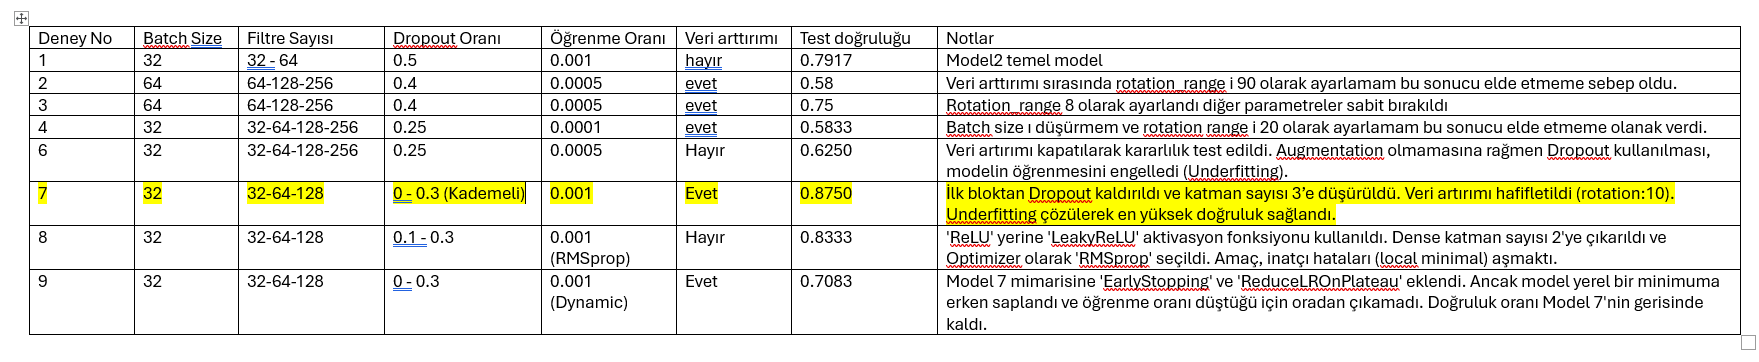

# NELERİ DEĞİŞTİRDİM

Model 2 (Eski): Sadece 2 Blok vardı (32 ve 64 filtreli Conv katmanları).

Model 3 (Yeni): 3. bir Blok eklendi ve filtre sayısı 128'e çıkarıldı.

Modelin daha karmaşık özellikleri (doku, kenar vb.) öğrenebilmesi için mimariyi derinleştirdim. 2 bloklu yapıyı 3 bloğa çıkarıp filtre sayısını 32-64-128 şeklinde artan bir yapıya dönüştürdüm.
********************************************************************************
Model 2 (Eski): Sadece en sonda, Dense katmanından sonra tek bir Dropout(0.5) vardı.

Model 3 (Yeni): Kademeli Dropout uygulandı.

2. Blok sonrası: 0.1

3. Blok sonrası: 0.2

  Dense katman sonrası: 0.3

Overfitting'i (aşırı öğrenme) sadece sonda değil, ara katmanlarda da engellemek için 'Kademeli Dropout' stratejisi izledim. Modelin ezberlemesini zorlaştırmak için her blok sonuna ufak unutma oranları ekledim.
********************************************************************************
Model 2 (Eski): ImageDataGenerator Yoktu (Sadece rescale).

Model 3 (Yeni): ImageDataGenerator var ve rotation_range=10, width_shift=0.1, height_shift=0.1, horizontal_flip=True.

Veri setimiz kısıtlı olduğu için modelin genelleme yeteneğini artırmak adına eğitim setine 'Online Data Augmentation' uyguladım. Görüntüleri her epoch'ta rastgele döndürerek ve kaydırarak veriyi çeşitlendirdim.
********************************************************************************



# NEDEN DAHA İYİ SONUÇ ALDIK ?

1. Veri Artırımı (Data Augmentation) Sayesinde "Genelleme" Arttı
Model 2'de veri artırımı yoktu, bu yüzden model eğitim setindeki görüntüleri ezberlemeye (overfitting) daha meyilliydi. Model 3'te ise Rotation (Döndürme) ve Shift (Kaydırma) gibi tekniklerle veriyi çeşitlendirdim. Bu sayede model, test setindeki hiç görmediği, farklı açılarda duran diş fırçası/macunu görsellerini daha iyi tanıdı.

2. Model Derinliğinin ve Kapasitenin Artırılması
Model 2'de sadece 64 filtreye kadar çıkmıştık. Model 3'te 3. bir Convolution bloğu ekleyerek filtre sayısını 128'e çıkardım. Bu derinleşme, modelin görüntülerdeki daha karmaşık ve ayırt edici özellikleri (fırça kılları, macun tüpü kıvrımları vb.) yakalamasını sağladı.

3. Daha Dengeli Regularization (Kademeli Dropout)
Model 2'de sadece sonda sert bir Dropout (0.5) vardı. Model 3'te ise katmanlar arasına kademeli Dropout (0.1, 0.2, 0.3) yerleştirdim. Bu strateji, nöronların birbirine aşırı bağımlı hale gelmesini engelledi ve eğitimin daha kararlı ilerlemesini sağladı.